<a href="https://www.kaggle.com/code/raniaaboussaoun/image-denoising?scriptVersionId=131251376" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Rania Aboussaboun - 2idsd1 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medical-image-dataset/Dataset/45.jpg
/kaggle/input/medical-image-dataset/Dataset/56.jpg
/kaggle/input/medical-image-dataset/Dataset/89.jpg
/kaggle/input/medical-image-dataset/Dataset/20.jpg
/kaggle/input/medical-image-dataset/Dataset/58.jpg
/kaggle/input/medical-image-dataset/Dataset/6.jpg
/kaggle/input/medical-image-dataset/Dataset/109.jpg
/kaggle/input/medical-image-dataset/Dataset/76.jpg
/kaggle/input/medical-image-dataset/Dataset/71.jpg
/kaggle/input/medical-image-dataset/Dataset/115.jpg
/kaggle/input/medical-image-dataset/Dataset/5.jpg
/kaggle/input/medical-image-dataset/Dataset/8.jpg
/kaggle/input/medical-image-dataset/Dataset/84.jpg
/kaggle/input/medical-image-dataset/Dataset/85.jpg
/kaggle/input/medical-image-dataset/Dataset/67.jpg
/kaggle/input/medical-image-dataset/Dataset/118.jpg
/kaggle/input/medical-image-dataset/Dataset/82.jpg
/kaggle/input/medical-image-dataset/Dataset/30.jpg
/kaggle/input/medical-image-dataset/Dataset/97.jpg
/kaggle/input/medical-image-dat

In [2]:
import tensorflow

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
from tensorflow.keras.preprocessing import image


In [4]:
train_images = sorted(os.listdir('/kaggle/input/medical-image-dataset/Dataset'))


Constructing the dataset in the required format


In [5]:
train_image = []
for im in train_images:
    img = image.load_img('/kaggle/input/medical-image-dataset/Dataset/'+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

the plot function : 

In [6]:
import matplotlib.pyplot as plt

def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(64,64), cmap='gray')
    plt.show()

- The function add_noise(image) takes an input image as a parameter and adds Gaussian noise to it.
- The function adds the generated noise matrix to the input image multiplied by a factor of 0.07. This factor determines the strength of the added noise. The multiplication gauss*0.07 scales the noise values before adding them to the image.


- By adding Gaussian noise to an image, the function can simulate random variations or imperfections that can occur in real-world image data.

In [7]:
def add_noice(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy

In [8]:
noised_df= []

for img in train_df:
    noisy= add_noice(img)
    noised_df.append(noisy)

In [9]:
noised_df= np.array(noised_df)


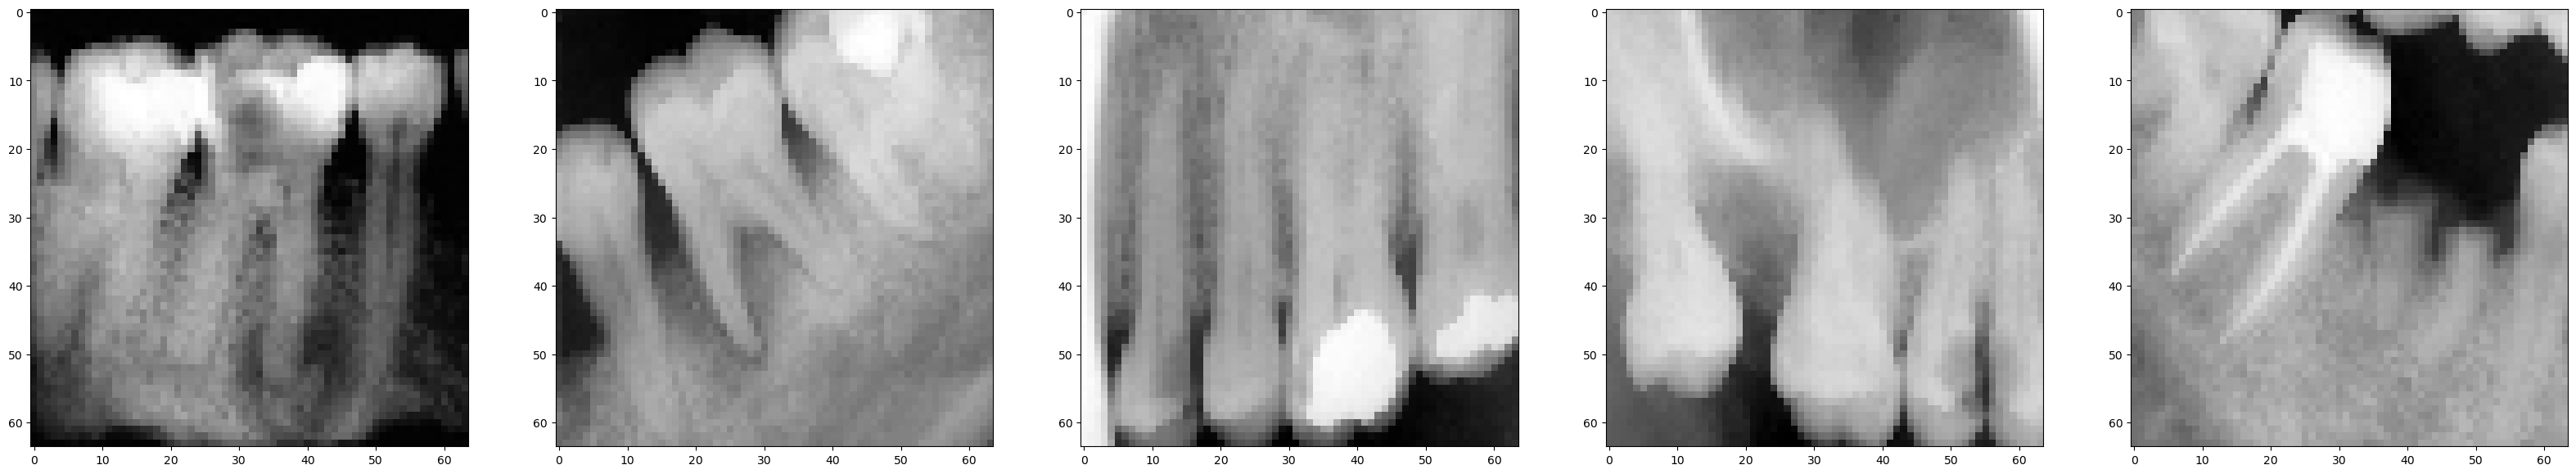

In [10]:
show_img(train_df)


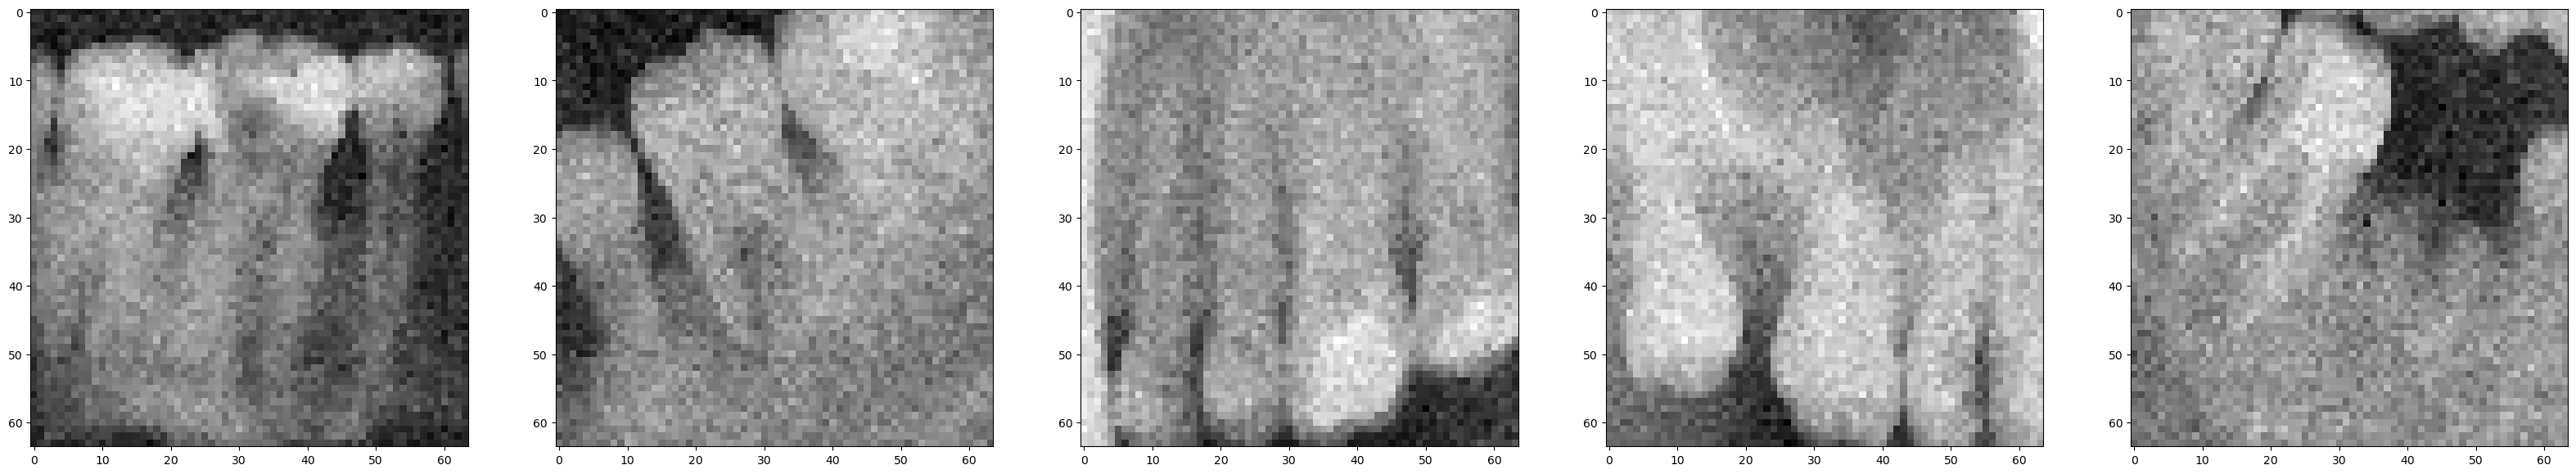

In [11]:
show_img(noised_df)


In [12]:
noised_df.shape


(120, 64, 64, 1)

In [13]:
train_df.shape


(120, 64, 64, 1)

In [14]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]


In [15]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K

In [16]:

def autoencoder():
    
    input_img = Input(shape=(64,64,1), name='image_input')
    
    #enoder 
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

The autoencoder() : returns an autoencoder model.

- The input to the autoencoder model is expected to be grayscale images with a shape of (64, 64, 1). 

- The encoder part of the autoencoder is defined using conv layers (Conv2D) and max pooling layers (MaxPooling2D). This part reduces the dimensions of the input image.

- The decoder part of the autoencoder is defined using conv layers and upsampling layers (UpSampling2D). This part reconstructs the input image from the encoded representation.

- The final layer of the decoder is a Conv2D layer with a sigmoid activation function. Since the input images are grayscale, the output is also a single-channel image.


- we use the Adam optimizer and the binary cross-entropy loss function. ( The Adam optimizer is a popular choice for training neural networks, and binary cross-entropy is a common loss function for binary classification problems.)


In [17]:
model= autoencoder()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        640       
                                                                 
 pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 16, 16, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 64)        36928     
                                                                 
 upsample1 (UpSampling2D)    (None, 32, 32, 64)        0     

In [18]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

- epochs=40 :  number of training epochs.
- batch_size=10 : the size of each mini-batch during training.
- validation_data=(xtest, xtest)  
- the EarlyStopping callback to stop training if the validation loss doesn't improve for a certain number of epochs

In [19]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=40, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/40
10/10 [==============================] - 9s 31ms/step - loss: 0.6723 - val_loss: 0.6431
Epoch 2/40
10/10 [==============================] - 0s 10ms/step - loss: 0.6141 - val_loss: 0.6004
Epoch 3/40
10/10 [==============================] - 0s 9ms/step - loss: 0.5891 - val_loss: 0.5838
Epoch 4/40
10/10 [==============================] - 0s 9ms/step - loss: 0.5788 - val_loss: 0.5804
Epoch 5/40
10/10 [==============================] - 0s 9ms/step - loss: 0.5741 - val_loss: 0.5754
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5707 - val_loss: 0.5724
Epoch 7/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5680 - val_loss: 0.5706
Epoch 8/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5666 - val_loss: 0.5704
Epoch 9/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5662 - val_loss: 0.5686
Epoch 10/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5638 - val_loss: 0.5659
Epoch 11/40
10/10

- First row: Original image
- Second row: Noice image
- Third row: Denoised image using Autoencoder
- Fourth row: Median filter image

In [20]:
xtrain= train_df[100:]


1/1 [==============================] - 0s 217ms/step


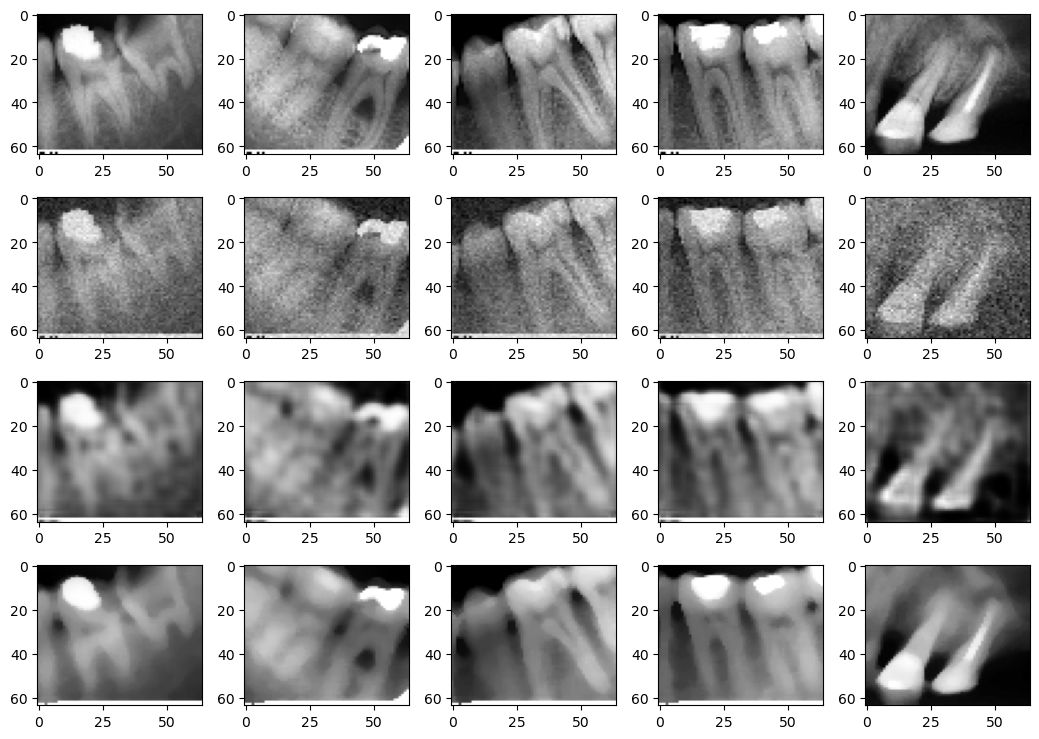

In [21]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')
       
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

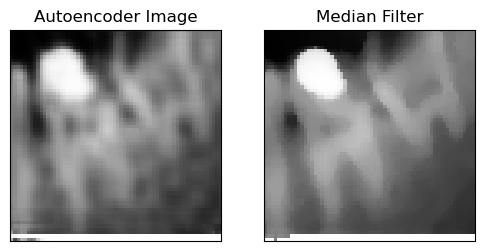

In [22]:
new_image = cv2.medianBlur(xtrain[0], (5))
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(pred[0].reshape(64,64), cmap='gray')
plt.title('Autoencoder Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
from math import log10, sqrt 
  
def PSNR(original, denoiced): 
    mse = np.mean((original - denoiced) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
value1 = PSNR(xtest[0], new_image)
value2 = PSNR(xtest[0], pred[0])

print(f"PSNR value for Denoised image is {value2} dB while for Median filtered image is {value1} dB")

PSNR value for Denoised image is 70.1062580743093 dB while for Median filtered image is 58.46361792818068 dB
